# maxPersistence
Given a point cloud and a function built on top of the data, we are interested in studying the evolution
of the sublevel sets (or superlevel sets) of the function, using persistent homology. The Maximal
Persistence Method selects the optimal smoothing parameter of the function, by maximizing the
number of significant topological features, or by maximizing the total significant persistence of the
features. For each value of the smoothing parameter, this function computes a persistence diagram
using gridDiag and returns the values of the two criteria, the dimension of detected features, their
persistence, and a bootstrapped confidence band. The features that fall outside of the band are
statistically significant. See References.

0   10   20   30   40   50   60   70   80   90   100
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Call: 
maxPersistence(FUN = kde, parameters = parametersKDE, X = X, 
    lim = lim, by = by, B = B, alpha = alpha, bandFUN = "bootstrapBand", 
    parallel = FALSE, printProgress = TRUE)

The number of significant features is maximized by 
[1] 0.3

The total significant persistence is maximized by 
[1] 0.1


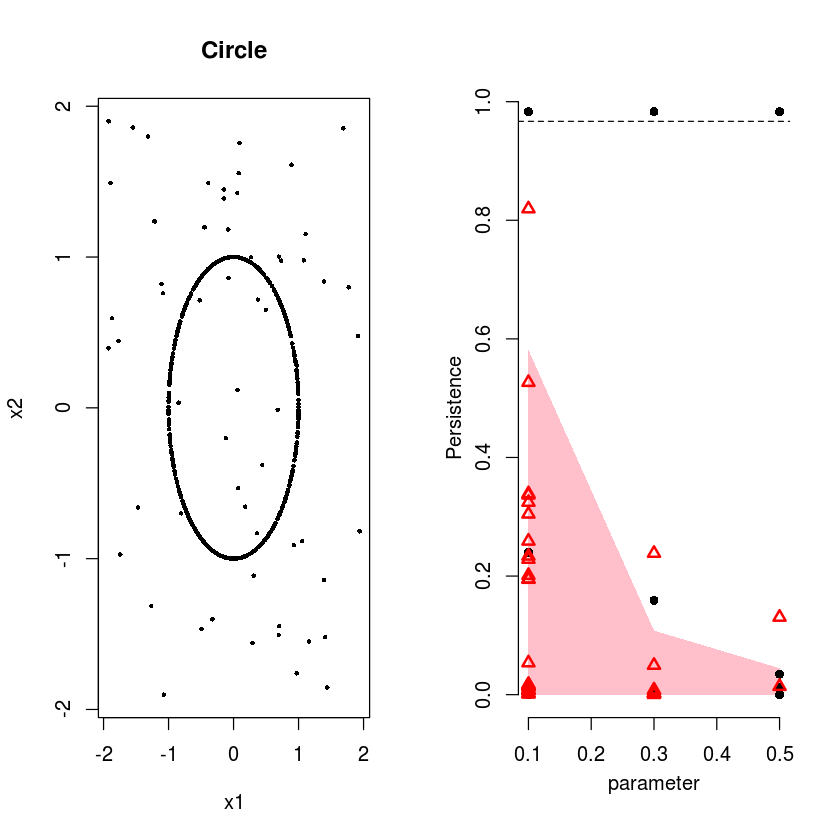

In [1]:
library(TDA)

## input data: circle with clutter noise
n <- 600
percNoise <- 0.1

XX1 <- circleUnif(n)
noise <- cbind(runif(percNoise * n, -2, 2), runif(percNoise * n, -2, 2))
X <- rbind(XX1, noise)

## limits of the Gird at which the density estimator is evaluated
Xlim <- c(-2, 2)
Ylim <- c(-2, 2)

lim <- cbind(Xlim, Ylim)
by <- 0.2
B <- 80
alpha <- 0.05

## candidates
parametersKDE <- seq(0.1, 0.5, by = 0.2)
maxKDE <- maxPersistence(kde, parametersKDE, X, lim = lim, by = by,
    bandFUN = "bootstrapBand", B = B, alpha = alpha,
    parallel = FALSE, printProgress = TRUE)

print(summary(maxKDE))
par(mfrow = c(1,2))
plot(X, pch = 16, cex = 0.5, main = "Circle")
plot(maxKDE)